# Purpose

The purpose of this notebook is to look into the basic information of the Spotify dataset

## Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import swifter
import os

## Prepping Data

In [2]:
data = pd.read_parquet('../data/KidListeningEventsWithAudioFeatures.gzip.parquet')
data.drop(columns = ['Artist Id', 'Album Id', 'Track Id', 'Event Unixtime', 'Artist', 'Album', 'Track'], inplace = True)
data = data[data['Mode'].isna() == False]
data

,Age,Education Level,User Id,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration Ms,Time Signature
2,16,HS,15397460,0.442,0.739,8.0,-5.619,1.0,0.0384,0.014800,0.154000,0.3680,0.112,134.019,252427.0,4.0
3,16,HS,15397460,0.316,0.944,0.0,-4.815,0.0,0.1740,0.000066,0.000000,0.1050,0.407,180.104,185400.0,4.0
4,16,HS,15397460,0.496,0.962,0.0,-4.482,0.0,0.2280,0.000018,0.000000,0.3330,0.552,139.956,191200.0,4.0
5,16,HS,15397460,0.371,0.341,10.0,-9.475,1.0,0.0319,0.570000,0.000031,0.1010,0.196,89.038,367133.0,1.0
6,16,HS,15397460,0.519,0.964,10.0,-5.148,0.0,0.2010,0.000763,0.000000,0.2020,0.381,94.981,241000.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37096507,16,HS,47574621,0.513,0.858,1.0,-5.383,1.0,0.0423,0.001110,0.000000,0.3590,0.555,100.076,250880.0,4.0
37096509,16,HS,47574621,0.573,0.954,5.0,-4.210,0.0,0.0715,0.003030,0.000000,0.3490,0.755,94.995,237907.0,4.0
37096510,16,HS,47574621,0.487,0.742,4.0,-4.788,1.0,0.0355,0.000203,0.000000,0.1180,0.174,142.016,262667.0,4.0
37096512,16,HS,47574621,0.317,0.988,4.0,-2.848,1.0,0.2100,0.003810,0.013900,0.3170,0.184,169.296,167916.0,4.0


In [3]:
meanPerUser = data.groupby(['Education Level', 'User Id'], observed = True).agg('mean').reset_index()
meanPerUser

,Education Level,User Id,Age,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration Ms,Time Signature
0,HS,3856459,17,0.593373,0.679299,5.458766,-7.294417,0.612928,0.062919,0.206142,0.133156,0.184668,0.538471,125.526476,224579.030119,3.946059
1,HS,4116740,16,0.427292,0.766354,5.364730,-6.874165,0.548127,0.072866,0.109197,0.320602,0.214407,0.376366,123.890371,278045.769337,3.882606
2,HS,4553514,17,0.564251,0.707613,5.392951,-7.288480,0.684728,0.114427,0.205071,0.091321,0.224258,0.550135,122.061869,214176.393498,3.926327
3,HS,4564155,17,0.578391,0.734435,5.399630,-7.088937,0.490287,0.072201,0.111897,0.317786,0.215022,0.414628,127.236809,265212.999537,3.972248
4,HS,5055395,17,0.523343,0.679589,4.861127,-6.575318,0.644139,0.061893,0.229938,0.054401,0.209050,0.433053,122.836172,227333.223327,3.967037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,MS,50002977,14,0.554149,0.747826,5.005128,-5.162426,0.584615,0.067373,0.105017,0.000178,0.240212,0.485162,112.453646,217924.558974,3.964103
3408,MS,50023120,13,0.475474,0.848667,5.129082,-4.832381,0.687403,0.077497,0.055187,0.020558,0.211941,0.468344,132.929118,214811.981337,3.939347
3409,MS,50056395,14,0.434621,0.812736,5.425287,-7.116517,0.540230,0.088229,0.080196,0.434892,0.240784,0.366305,124.139632,289821.287356,3.770115
3410,MS,50067254,14,0.575168,0.778509,5.631579,-5.922716,0.673684,0.113573,0.093188,0.114695,0.189867,0.579214,123.518084,234707.042105,3.968421


## Basic Information

In [4]:
print('Number of Listening Events with Audio Features: ' + str(len(data)))
data.describe()

Number of Listening Events with Audio Features: 21579859


,Age,User Id,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration Ms,Time Signature
count,2.157986e+07,2.157986e+07,2.157986e+07,2.157986e+07,2.157986e+07,2.157986e+07,2.157986e+07,2.157986e+07,2.157986e+07,2.157986e+07,2.157986e+07,2.157986e+07,2.157986e+07,2.157986e+07,2.157986e+07
mean,1.608575e+01,3.334791e+07,4.822181e-01,7.461607e-01,5.289512e+00,-6.854455e+00,6.177724e-01,8.203835e-02,1.549250e-01,1.485279e-01,2.144426e-01,4.253611e-01,1.254111e+02,2.422764e+05,3.914627e+00
std,1.565064e+00,1.186009e+07,1.664038e-01,2.263370e-01,3.557790e+00,3.888135e+00,4.859318e-01,8.021017e-02,2.621687e-01,2.859398e-01,1.727445e-01,2.413221e-01,2.974819e+01,9.943277e+04,3.856657e-01
min,6.000000e+00,2.014225e+06,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+03,0.000000e+00
25%,1.600000e+01,2.549590e+07,3.650000e-01,6.190000e-01,2.000000e+00,-8.305000e+00,0.000000e+00,3.610000e-02,6.260000e-04,1.420000e-06,9.940000e-02,2.270000e-01,1.023210e+02,1.936380e+05,4.000000e+00
50%,1.700000e+01,3.523315e+07,4.840000e-01,8.170000e-01,5.000000e+00,-5.835000e+00,1.000000e+00,5.240000e-02,1.450000e-02,5.150000e-04,1.440000e-01,4.000000e-01,1.240610e+02,2.290000e+05,4.000000e+00
75%,1.700000e+01,4.229310e+07,5.950000e-01,9.300000e-01,8.000000e+00,-4.301000e+00,1.000000e+00,9.350000e-02,1.780000e-01,9.190000e-02,2.950000e-01,6.030000e-01,1.441290e+02,2.732400e+05,4.000000e+00
max,1.700000e+01,5.096744e+07,9.900000e-01,1.000000e+00,1.100000e+01,6.085000e+00,1.000000e+00,9.660000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.479980e+02,5.764624e+06,5.000000e+00


In [5]:
print('Number of Users with Audio Features: ' + str(len(meanPerUser)))
meanPerUser.describe()

Number of Users with Audio Features: 3412


,User Id,Age,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration Ms,Time Signature
count,3.412000e+03,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000
mean,3.807324e+07,16.003810,0.500092,0.738375,5.280616,-6.852127,0.618104,0.082724,0.163876,0.138312,0.212786,0.442113,125.232142,241379.496299,3.921347
std,1.129769e+07,1.496497,0.080840,0.103158,0.406920,1.753984,0.097548,0.036577,0.111116,0.128239,0.034612,0.095023,5.830946,29863.312573,0.054178
min,2.014225e+06,6.000000,0.237410,0.153763,1.000000,-21.510407,0.000000,0.033316,0.001274,0.000000,0.099544,0.123485,75.994000,133929.396120,3.535714
25%,3.166842e+07,16.000000,0.446924,0.673309,5.085335,-7.726390,0.557182,0.060948,0.079528,0.045107,0.193130,0.381772,122.010553,223638.612132,3.892141
50%,4.069051e+07,16.000000,0.497198,0.745105,5.289119,-6.553767,0.616963,0.073700,0.142607,0.096084,0.209241,0.447884,125.118259,235814.913491,3.928730
75%,4.805384e+07,17.000000,0.552287,0.813223,5.472287,-5.616545,0.680000,0.092953,0.222978,0.194675,0.227448,0.507063,128.526959,253479.047862,3.959377
max,5.096744e+07,17.000000,0.867000,0.974592,9.125000,-3.270773,1.000000,0.614333,0.936337,0.741944,0.687000,0.950667,162.430500,460907.029557,4.064516


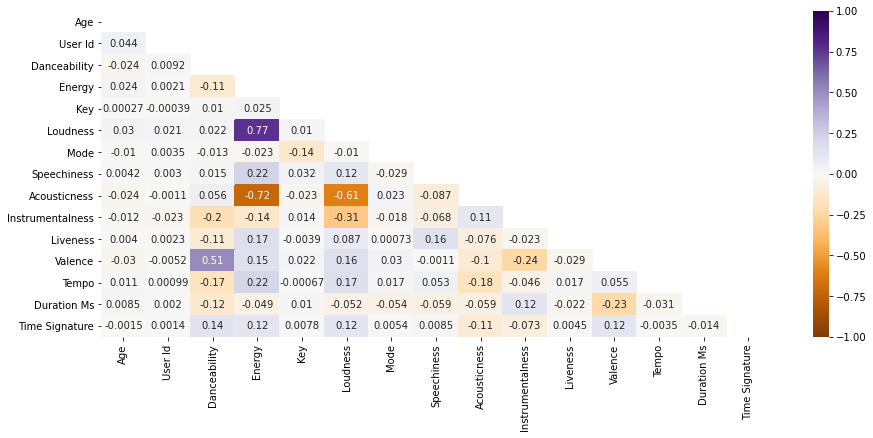

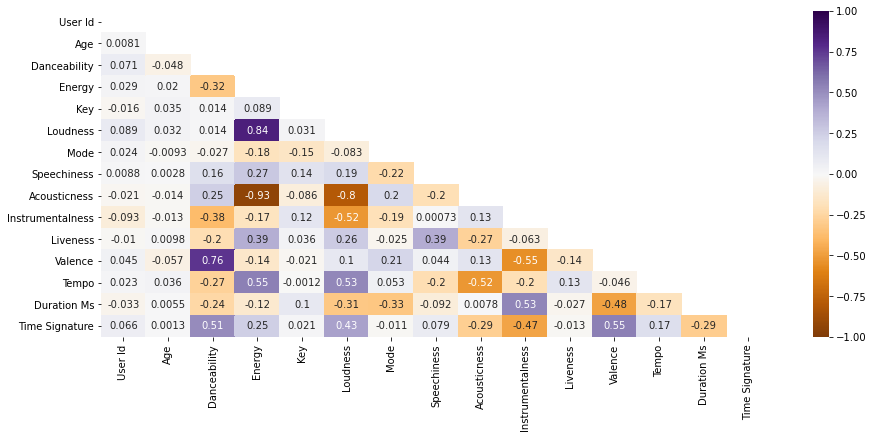

In [6]:
for dataset in [data, meanPerUser]:
    corr = dataset.corr()
    vmax = np.abs(corr.values).max()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    fig = plt.figure()
    fig.set_size_inches(w=15,h=6)
    sns.heatmap(corr, cmap = plt.cm.PuOr, vmin = -vmax, vmax = vmax, annot=True, mask=mask);

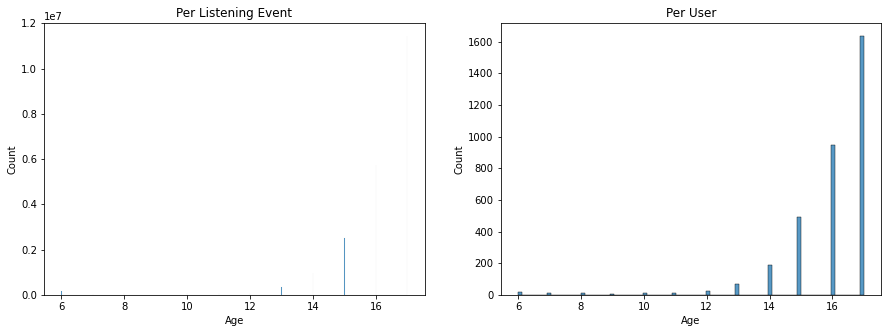

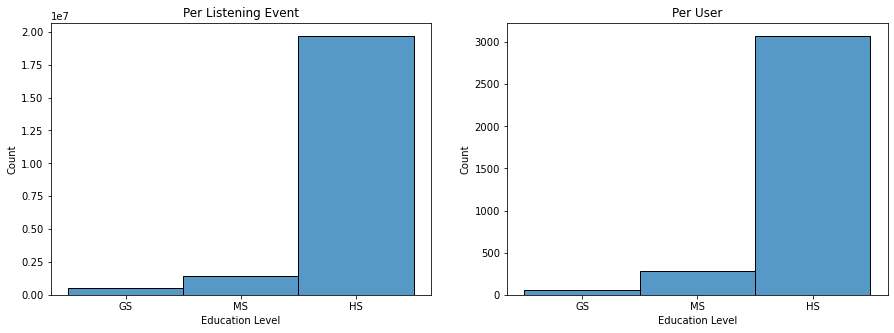

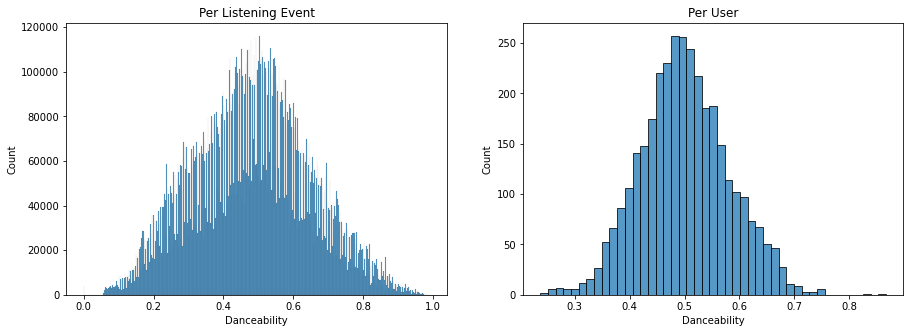

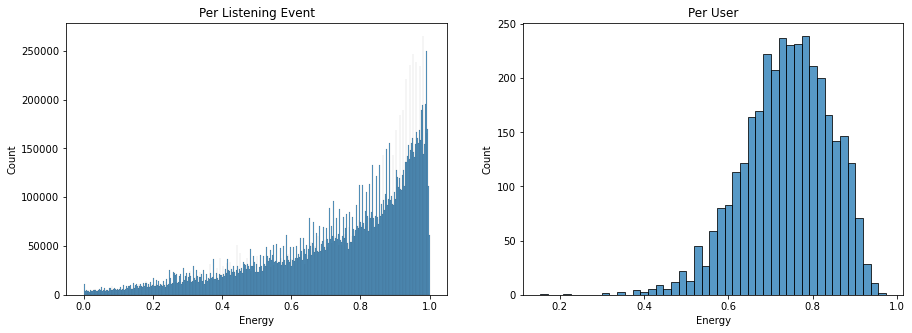

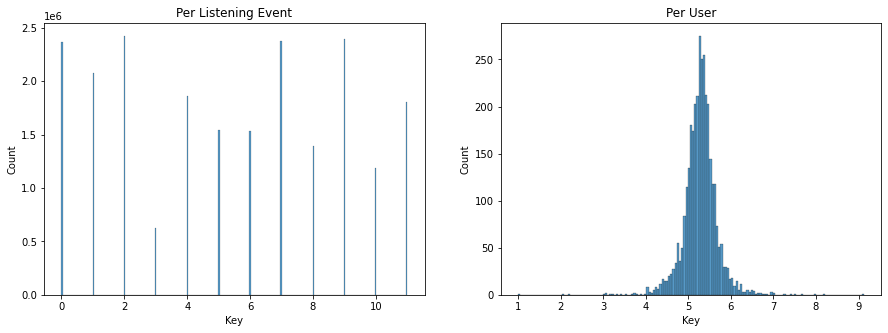

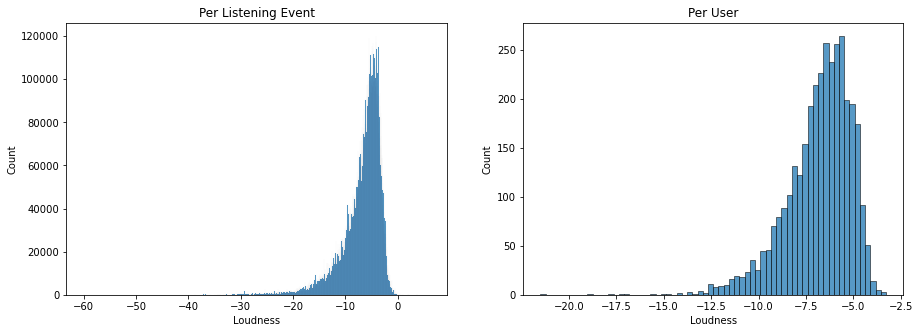

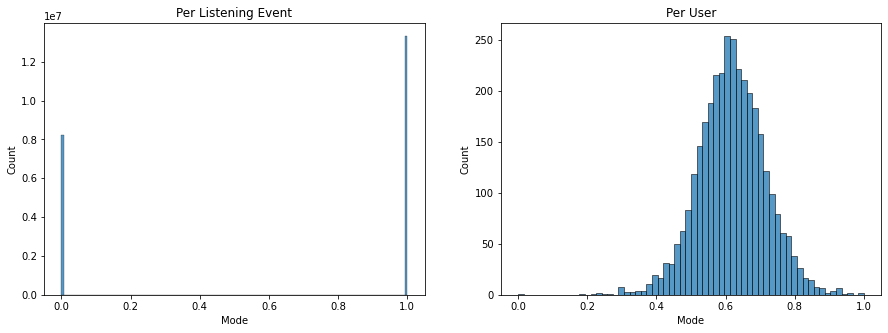

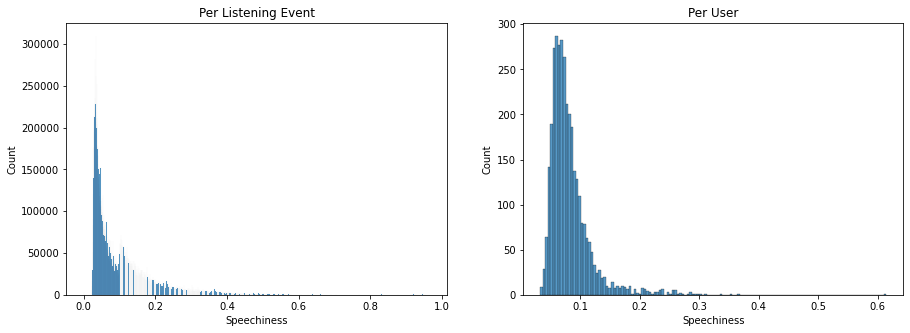

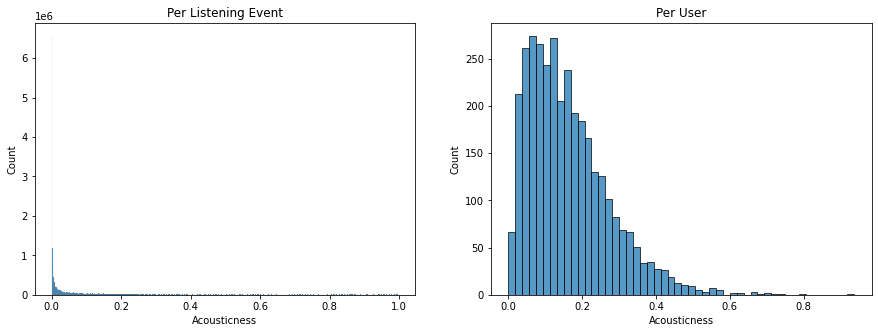

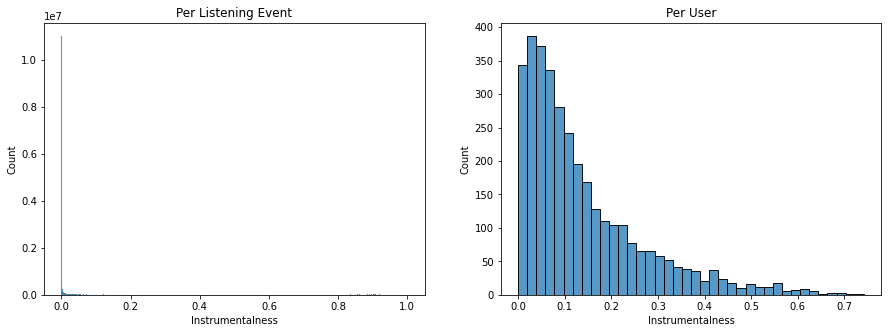

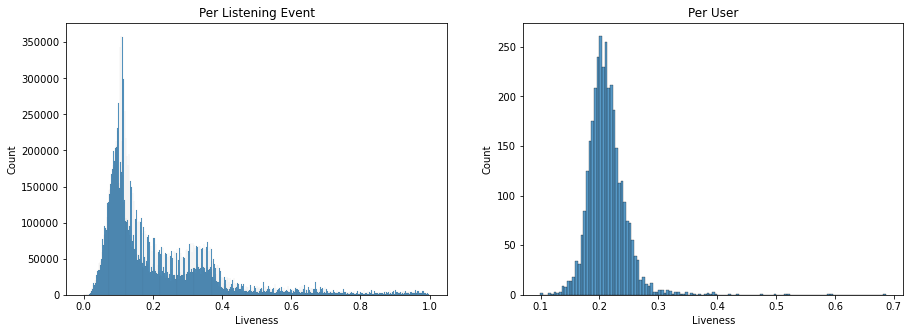

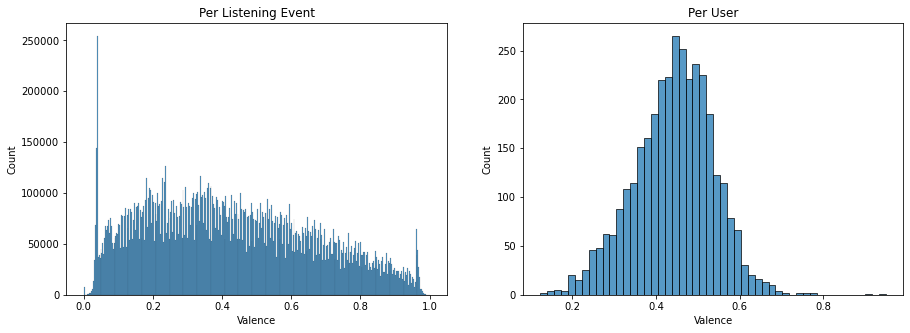

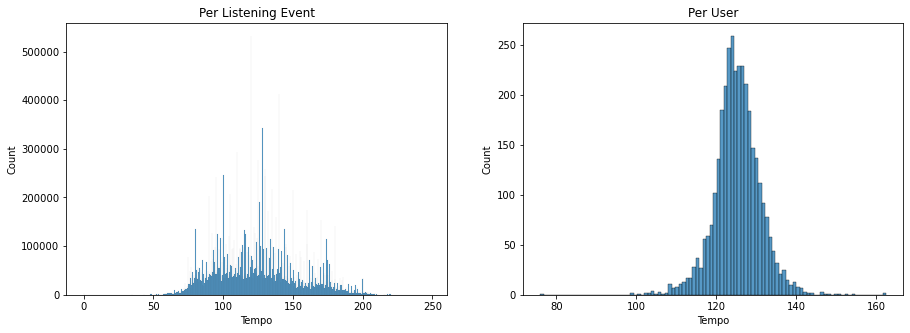

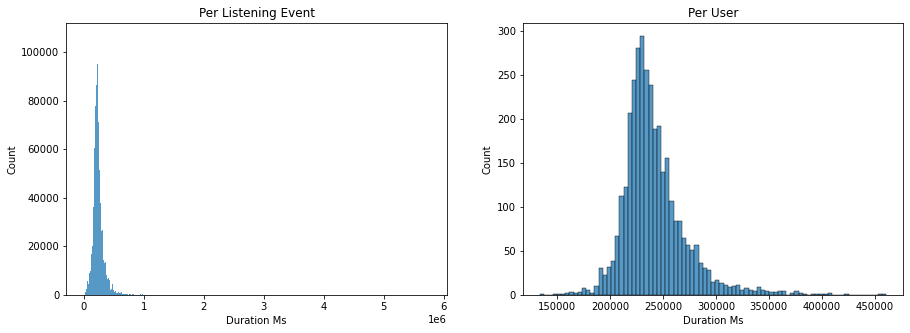

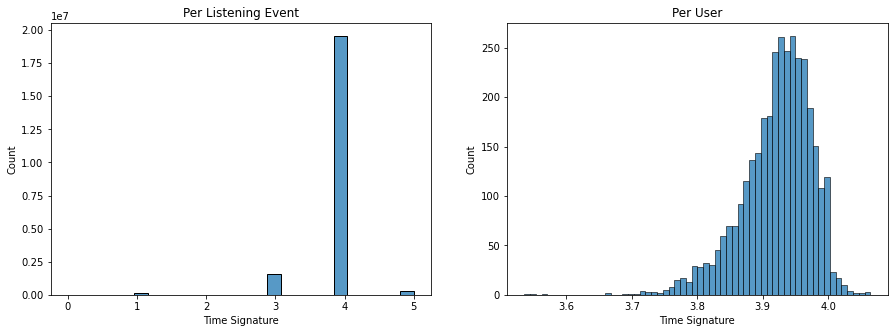

In [7]:
for column in data.columns:
    if (column == 'User Id'):
        continue

    fig, axs = plt.subplots(ncols=2, figsize=(15, 5));
    ax = sns.histplot(data = data[column], kde = False, ax = axs[0])
    ax.set(title = 'Per Listening Event')

    ax = sns.histplot(data = meanPerUser[column], kde = False, ax = axs[1])
    ax.set(title = 'Per User')
    
    plt.show();